# Análisis Exploratorio de Datos (EDA):

## Objetivo
Este notebook contiene el análisis exploratorio completo del dataset, siguiendo una estructura organizada y metódica para entender los datos, limpiarlos y prepararlos para modelado.

## Contenido
1. Configuración Inicial y librearías
2. Limpieza
    - Carga de datos sucios
3. Análisis Exploratorio de los Datos
    - Carga de datos limpios
4. Análisis estadístico
5. Análisis Univariante
6. Análisis Bivariante

# 1. Configuración Inicial

Importamos las bibliotecas necesarias y configuramos el entorno de trabajo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import os
import re


### Configuración del estilo visual

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows
# pd.set_option('display.max_colwidth', None) # Show entire content of each column
pd.set_option('display.width', None)        # No limit on display width
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping

In [4]:
df_clean_data = pd.read_csv("data/df_final.csv")
df_clean_data.head(20)

,entity,year,schizophrenia_disorders,depressive_disorders,anxiety_disorders,bipolar_disorders,eating_disorders,dalys_depressive_disorders,dalys_schizophrenia,dalys_bipolar_disorder,dalys_eating_disorders,dalys_anxiety_disorders
0,Afghanistan,1990,0.223206,4.996118,4.713314,0.703023,0.127700,895.22565,138.24825,147.64412,26.471115,440.33000
1,Afghanistan,1991,0.222454,4.989290,4.702100,0.702069,0.123256,893.88434,137.76122,147.56696,25.548681,439.47202
2,Afghanistan,1992,0.221751,4.981346,4.683743,0.700792,0.118844,892.34973,137.08030,147.13086,24.637949,437.60718
3,Afghanistan,1993,0.220987,4.976958,4.673549,0.700087,0.115089,891.51587,136.48602,146.78812,23.863169,436.69104
4,Afghanistan,1994,0.220183,4.977782,4.670810,0.699898,0.111815,891.39160,136.18323,146.58481,23.189074,436.76800
5,Afghanistan,1995,0.219409,4.978228,4.668100,0.699768,0.108507,891.21344,135.65398,146.63217,22.503244,436.69098
6,Afghanistan,1996,0.218465,4.981489,4.665759,0.699650,0.105269,891.92096,135.16324,146.67957,21.827526,436.52713
7,Afghanistan,1997,0.217286,4.987593,4.665013,0.699597,0.101531,893.02045,134.20360,146.54947,21.124723,436.42557
8,Afghanistan,1998,0.216074,4.996858,4.668240,0.699765,0.098050,894.73680,133.56137,146.69704,20.412657,436.77020
9,Afghanistan,1999,0.215068,5.004257,4.673557,0.700054,0.095723,896.13806,132.82457,146.76817,19.931143,437.12753


In [5]:
df_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6150 entries, 0 to 6149
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   entity                      6150 non-null   object 
 1   year                        6150 non-null   int64  
 2   schizophrenia_disorders     6150 non-null   float64
 3   depressive_disorders        6150 non-null   float64
 4   anxiety_disorders           6150 non-null   float64
 5   bipolar_disorders           6150 non-null   float64
 6   eating_disorders            6150 non-null   float64
 7   dalys_depressive_disorders  6150 non-null   float64
 8   dalys_schizophrenia         6150 non-null   float64
 9   dalys_bipolar_disorder      6150 non-null   float64
 10  dalys_eating_disorders      6150 non-null   float64
 11  dalys_anxiety_disorders     6150 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 576.7+ KB


In [6]:
df_clean_data.describe()

,year,schizophrenia_disorders,depressive_disorders,anxiety_disorders,bipolar_disorders,eating_disorders,dalys_depressive_disorders,dalys_schizophrenia,dalys_bipolar_disorder,dalys_eating_disorders,dalys_anxiety_disorders
count,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000
mean,2004.500000,0.266031,3.766168,4.098702,0.638366,0.194945,650.147720,170.168725,137.602358,41.622553,391.391882
std,8.656145,0.039258,0.939617,1.060642,0.235506,0.139051,189.881727,25.574189,50.977136,29.615846,101.513141
min,1990.000000,0.188416,1.522333,1.879996,0.181667,0.044780,243.097840,119.913380,39.438133,9.671199,180.049640
25%,1997.000000,0.241982,3.063132,3.425237,0.521153,0.095748,500.949597,154.312173,112.243175,20.541226,326.350750
50%,2004.500000,0.272983,3.642872,3.939547,0.579017,0.144325,630.373350,174.697920,123.508730,30.762172,375.719120
75%,2012.000000,0.285912,4.369088,4.539975,0.853304,0.242860,764.889150,183.565115,184.623580,51.641518,433.911575
max,2019.000000,0.462045,7.645899,8.624634,1.506730,1.031688,1427.423600,291.100100,325.152800,218.704390,814.302300


## Analisis exploratorio de datos

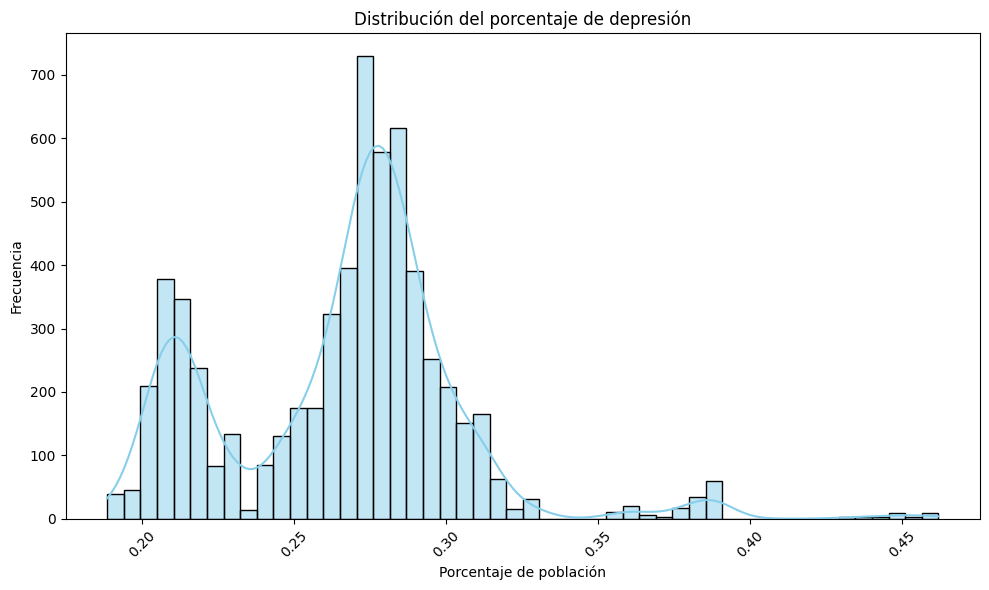

In [10]:
df_data = pd.read_csv("data/df_final.csv")

# 2. Preprocesamiento: convierte la columna a numérica si es necesario
df_clean_data = df_data.copy()
col_name = 'schizophrenia_disorders'
df_clean_data[col_name] = pd.to_numeric(df_clean_data[col_name], errors='coerce')

# 3. Genera el gráfico
plt.figure(figsize=(10, 6))
sns.histplot(df_clean_data[col_name], bins=50, kde=True, color='skyblue')
plt.title('Distribución del porcentaje de depresión')
plt.xlabel('Porcentaje de población')
plt.ylabel('Frecuencia')

# Solo si los valores son numéricos muy grandes o pequeños:
# plt.ticklabel_format(axis='x', style='plain')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


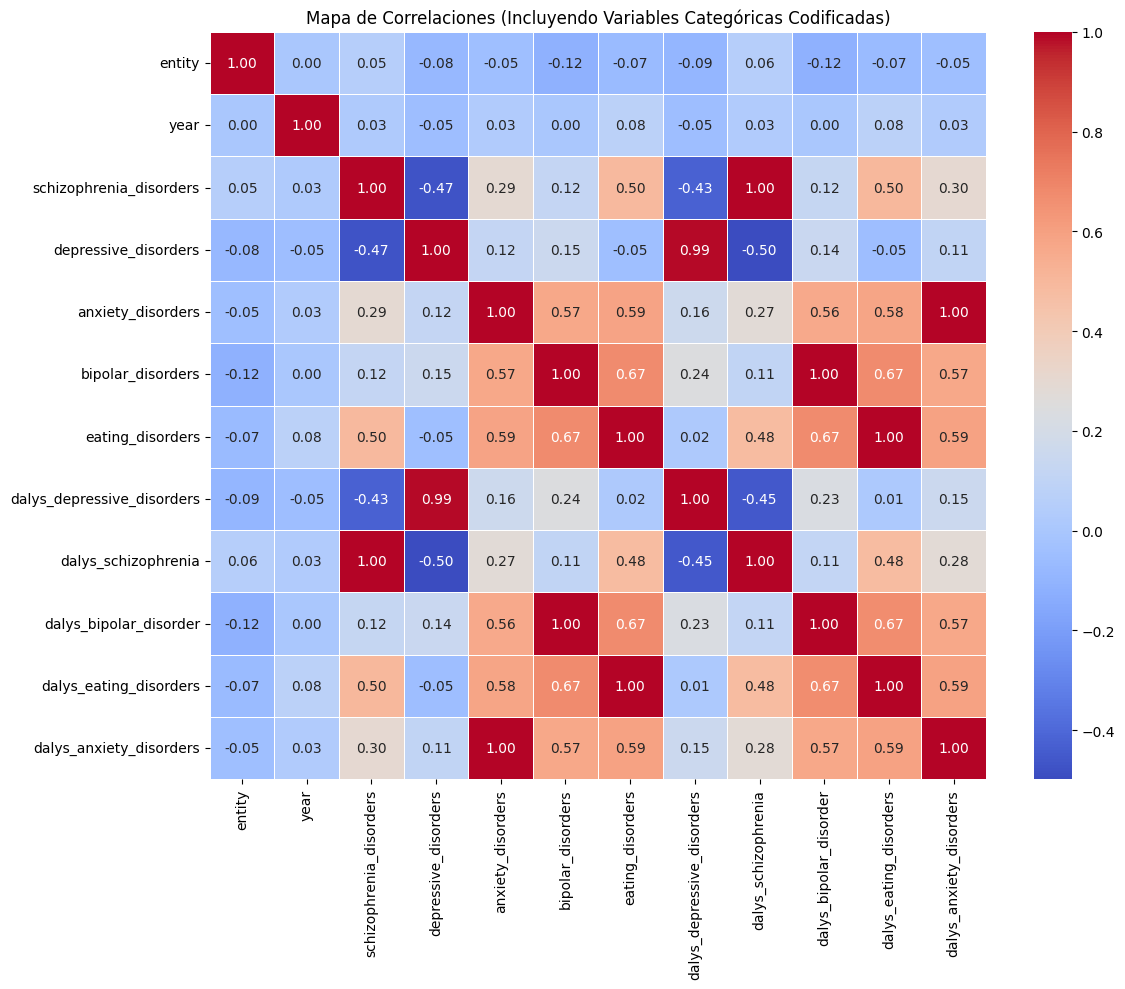

In [11]:
# Copiar el DataFrame original para no modificarlo directamente
df_encoded = df_clean_data.copy()

# Codificar las columnas categóricas con LabelEncoder
label_encoder = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Crear el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Correlaciones (Incluyendo Variables Categóricas Codificadas)')
plt.tight_layout()
plt.show()

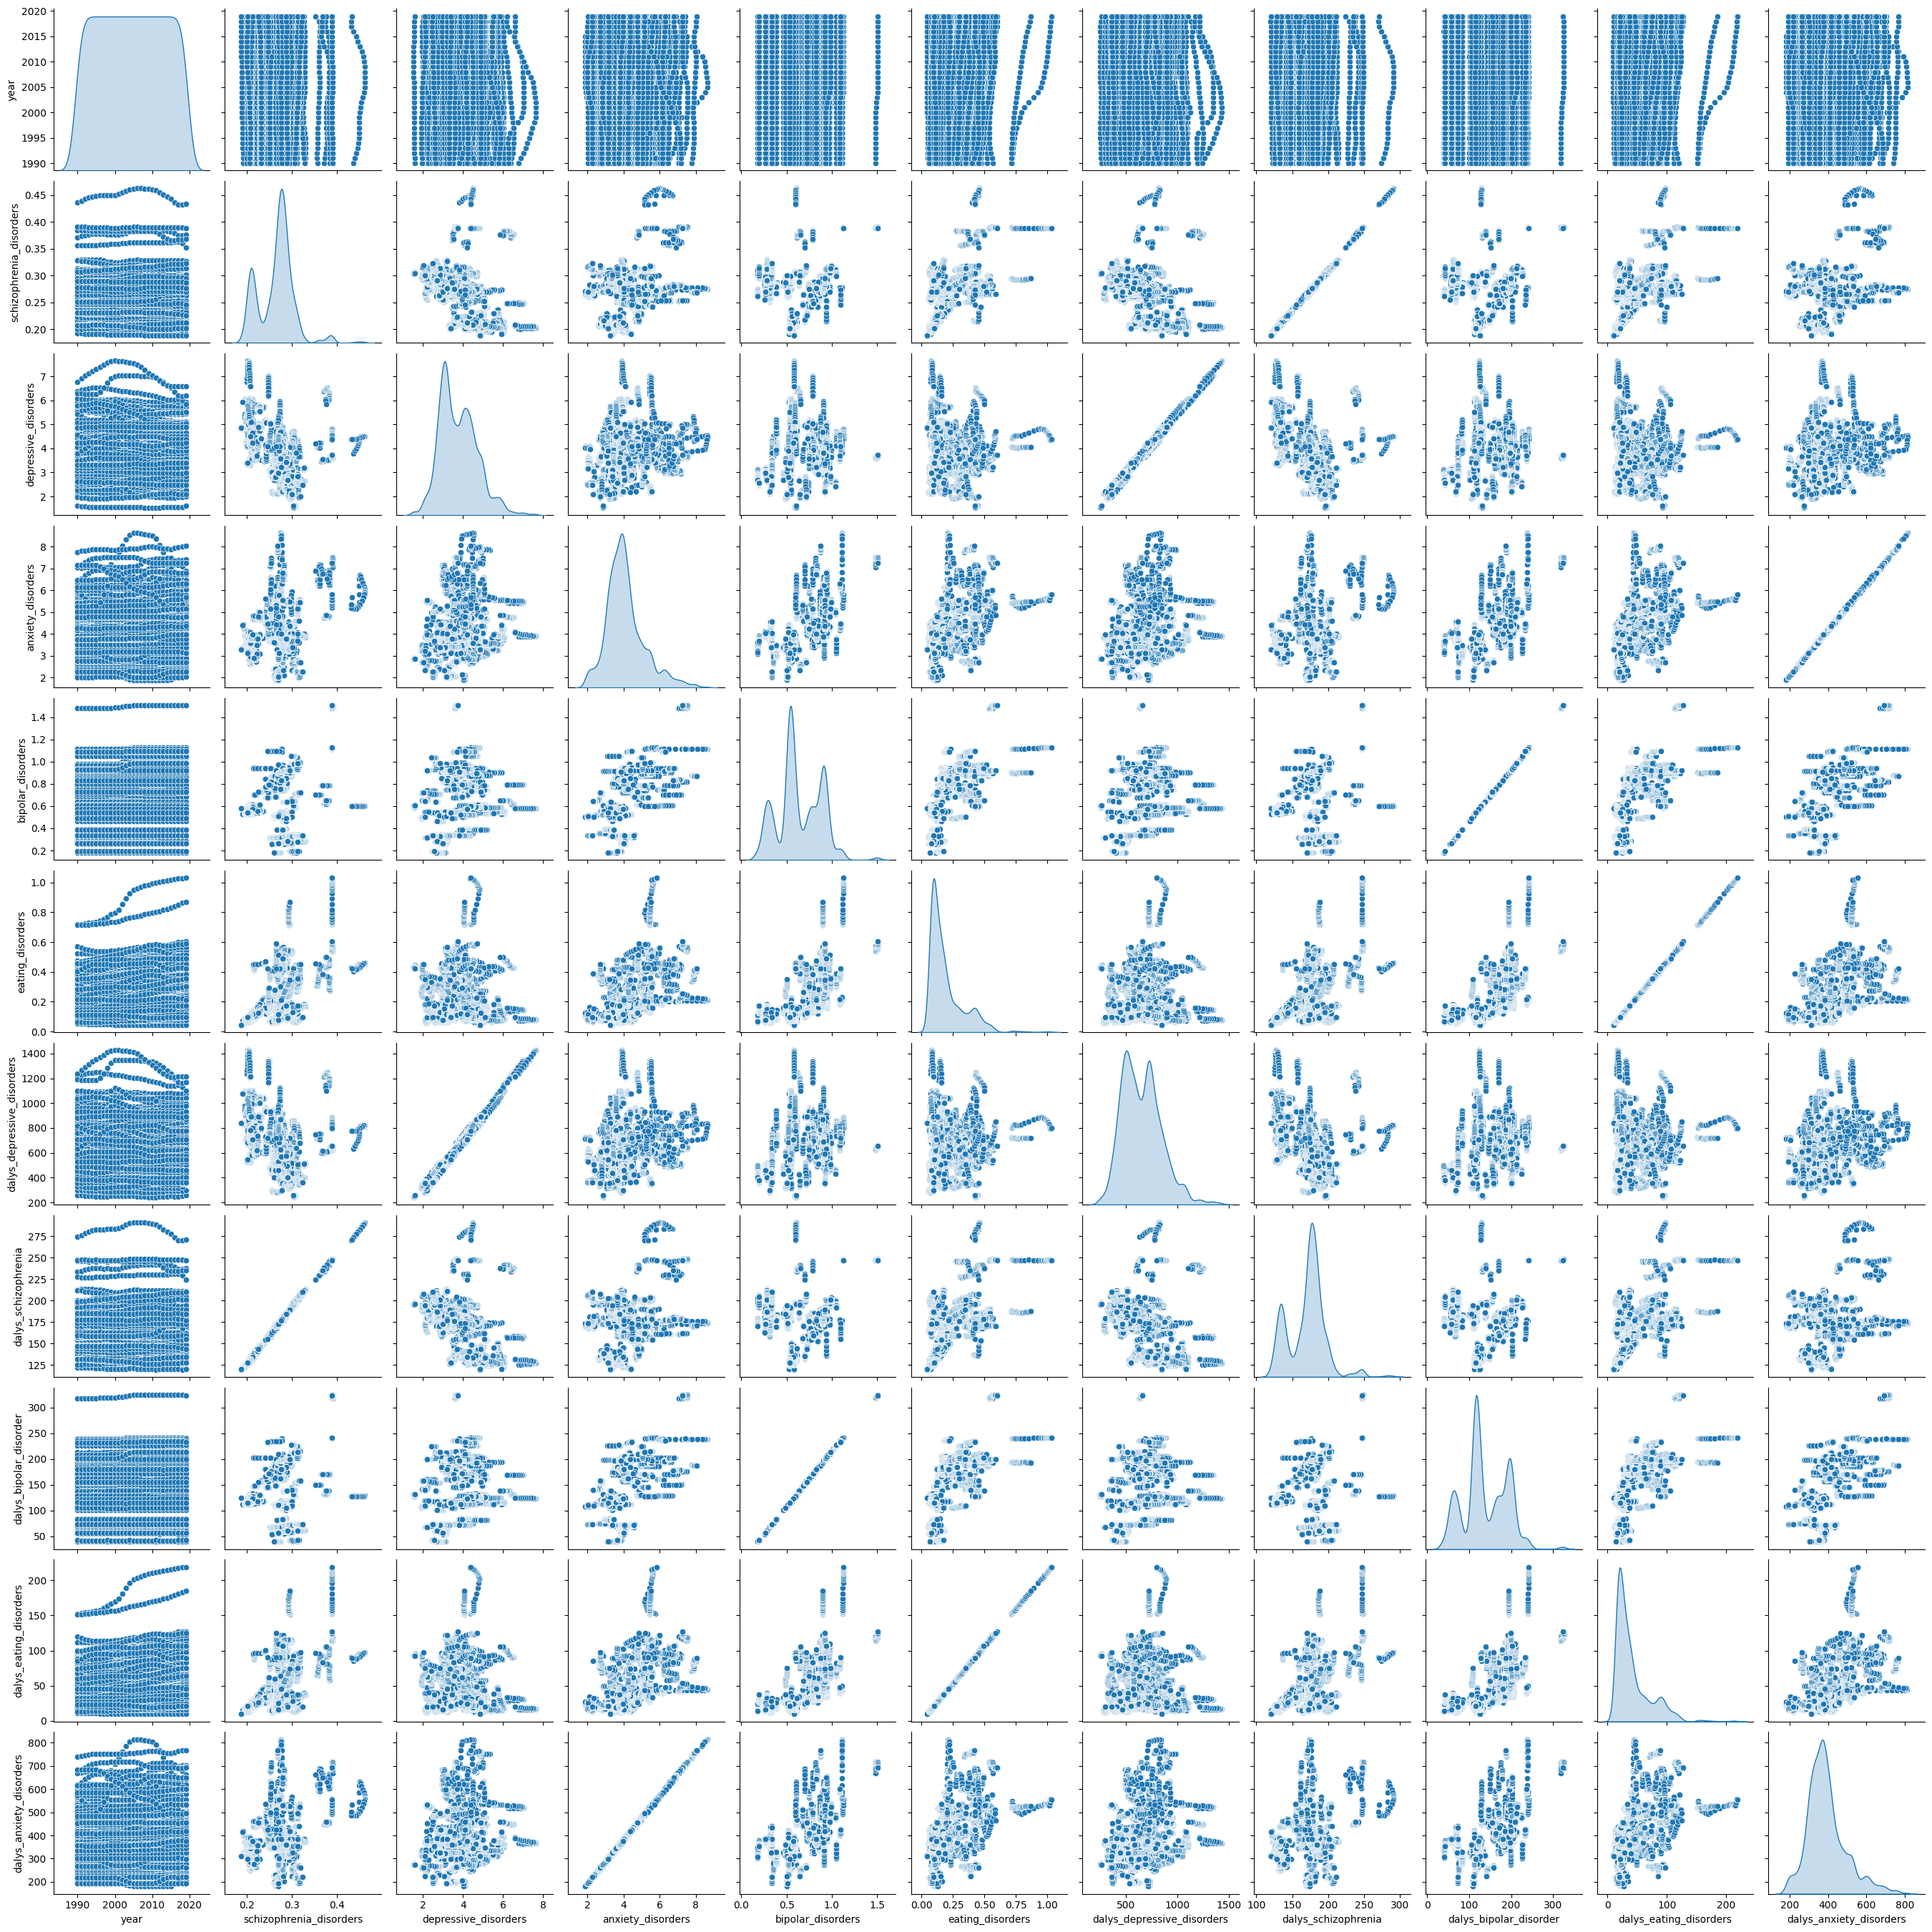

<Figure size 1000x800 with 0 Axes>

In [13]:
sns.pairplot(df_clean_data, diag_kind='kde')
plt.figure(figsize=(10, 8))
plt.suptitle('Relación entre Variables Numéricas', y=1.02)
plt.show()

In [14]:
df_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6150 entries, 0 to 6149
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   entity                      6150 non-null   object 
 1   year                        6150 non-null   int64  
 2   schizophrenia_disorders     6150 non-null   float64
 3   depressive_disorders        6150 non-null   float64
 4   anxiety_disorders           6150 non-null   float64
 5   bipolar_disorders           6150 non-null   float64
 6   eating_disorders            6150 non-null   float64
 7   dalys_depressive_disorders  6150 non-null   float64
 8   dalys_schizophrenia         6150 non-null   float64
 9   dalys_bipolar_disorder      6150 non-null   float64
 10  dalys_eating_disorders      6150 non-null   float64
 11  dalys_anxiety_disorders     6150 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 576.7+ KB


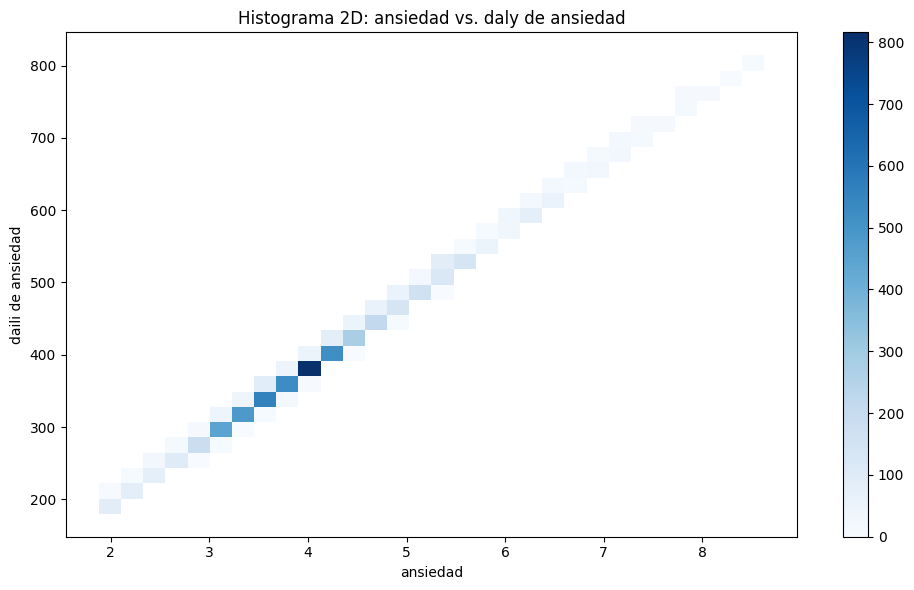

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data = df_clean_data,
    x='anxiety_disorders',
    y='dalys_anxiety_disorders',
    bins=30,
    cmap='Blues',
    cbar=True
)
plt.title('Histograma 2D: ansiedad vs. daly de ansiedad')
plt.xlabel('ansiedad')
plt.ylabel('daili de ansiedad')
plt.tight_layout()
plt.show()

C:\Users\Marie\AppData\Local\Temp\ipykernel_14216\2987223657.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Nivel de Depresión', fontsize=12)


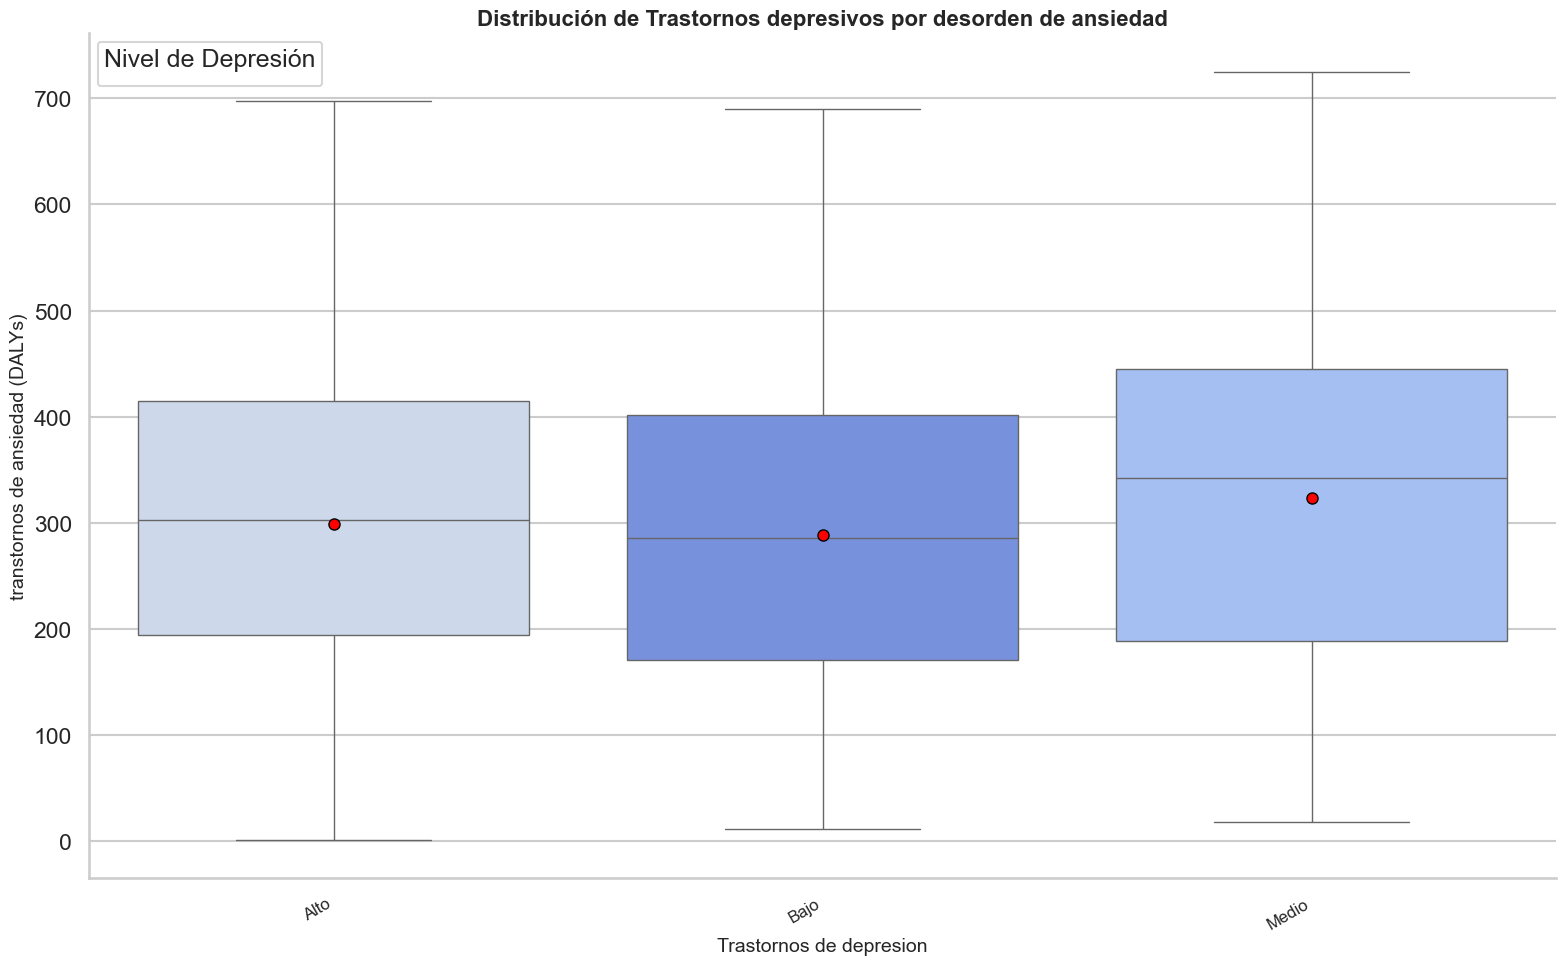

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Generar datos de ejemplo (reemplaza esto con tu df_clean_data)
np.random.seed(42)
num_samples = 500
df_clean_data = pd.DataFrame({
    'depressive_disorders': np.random.choice(['Bajo', 'Medio', 'Alto'], num_samples),
    'dalys_anxiety_disorders': np.random.rand(num_samples) * 500 + (np.random.randn(num_samples) * 100).clip(min=0)
})

# Ordenar las categorías para la visualización
order = ['Bajo', 'Medio', 'Alto']

# Configuración de estilo
sns.set(style="whitegrid", context="talk", palette="coolwarm")

plt.figure(figsize=(16, 10))
ax = sns.boxplot(
    data=df_clean_data,
    x='depressive_disorders',
    y='dalys_anxiety_disorders',
    hue='depressive_disorders',  # Añadimos 'hue' para diferenciar por color
    hue_order=order,             # Mantenemos el orden de las categorías en el hue
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black", "markersize": 8}
)

# Título y etiquetas
plt.title('Distribución de Trastornos depresivos por desorden de ansiedad', fontsize=16, fontweight='bold', loc='center')
plt.xlabel('Trastornos de depresion', fontsize=14)
plt.ylabel('transtornos de ansiedad (DALYs)', fontsize=14) # Aclaramos la unidad del eje y

# Rotación y ajuste de etiquetas
plt.xticks(rotation=30, ha='right', fontsize=12)

# Leyenda más clara
plt.legend(title='Nivel de Depresión', fontsize=12)

# Ajuste del layout
plt.tight_layout()

# Estilo despine para un look más limpio
sns.despine()

plt.show()


"Distribución de Trastornos depresivos por desorden de ansiedad" 

- Indica que la gráfica muestra cómo se distribuyen los niveles de trastornos de ansiedad en diferentes grupos de niveles de trastornos depresivos.

Eje Horizontal (Trastornos de depresión): Este eje representa las categorías o niveles de trastornos depresivos. En este caso, tienes tres categorías: "Alto", "Bajo" y "Medio".

Eje Vertical (transtornos de ansiedad (DALYs)): Este eje representa la magnitud de los trastornos de ansiedad, medidos en DALYs (Disability-Adjusted Life Years). Los DALYs son una medida de la carga de enfermedad, combinando años de vida perdidos por muerte prematura y años vividos con discapacidad ajustada por su gravedad.

Cada Boxplot: Cada caja vertical (boxplot) representa la distribución de los niveles de trastornos de ansiedad para cada una de las categorías de trastornos depresivos. Vamos a desglosar qué representa cada parte de un boxplot:

La Caja (El rectángulo coloreado):

El borde inferior de la caja indica el percentil 25% de los datos. Esto significa que el 25% de los individuos en ese nivel de depresión tienen un nivel de ansiedad igual o inferior a este valor.
La línea horizontal dentro de la caja representa la mediana (percentil 50%) de los datos. Es el valor central de la distribución de ansiedad para ese grupo de depresión.
El borde superior de la caja indica el percentil 75% de los datos. Esto significa que el 75% de los individuos en ese nivel de depresión tienen un nivel de ansiedad igual o inferior a este valor.
La altura de la caja (rango intercuartílico - IQR) representa el 50% central de los datos. Es la diferencia entre el percentil 75% y el percentil 25%.
Los Bigotes (Las líneas que se extienden desde la caja): Los bigotes se extienden desde los bordes de la caja hasta los valores que aún se consideran dentro de un rango "típico" de la distribución. Generalmente, se extienden hasta 1.5 veces el IQR por encima del percentil 75% y 1.5 veces el IQR por debajo del percentil 25%.

Los Puntos Rojos con Borde Negro: Estos puntos representan la media (promedio) de los niveles de ansiedad para cada grupo de nivel de depresión.

Interpretación de la Gráfica:

Al observar los boxplots, puedes comparar la distribución de los trastornos de ansiedad entre los diferentes niveles de trastornos depresivos:

Nivel de Depresión "Alto": La caja para el nivel de depresión "Alto" parece estar ubicada ligeramente más abajo en el eje de ansiedad en comparación con los otros dos niveles. Su mediana (línea horizontal dentro de la caja) también parece ser un poco menor. Esto sugiere que, en este conjunto de datos, las personas con un nivel "Alto" de trastornos depresivos tienden a tener, en promedio, niveles de trastornos de ansiedad ligeramente más bajos que los otros grupos. Sin embargo, la dispersión de los datos (la altura de la caja y la longitud de los bigotes) indica la variabilidad dentro de este grupo.

Nivel de Depresión "Bajo": El boxplot para el nivel de depresión "Bajo" muestra una mediana de ansiedad que parece ser similar o ligeramente superior a la del grupo "Alto". La dispersión de los datos también es notable.

Nivel de Depresión "Medio": El boxplot para el nivel de depresión "Medio" muestra una mediana de ansiedad que parece ser comparable a la del grupo "Bajo". La dispersión de los datos también es significativa.

Comparación de Medias (Puntos Rojos): Los puntos rojos (las medias) te dan una comparación directa del promedio de los niveles de ansiedad para cada nivel de depresión. Observando sus posiciones verticales, puedes ver qué grupo tiene el promedio más alto o más bajo de trastornos de ansiedad. En esta gráfica, las medias parecen estar relativamente cercanas entre los tres grupos.

En resumen, esta gráfica de boxplots te permite visualizar y comparar la distribución de los trastornos de ansiedad en diferentes niveles de trastornos depresivos. Puedes observar las medianas, la dispersión (variabilidad) y la presencia de posibles valores atípicos (aunque no se muestran explícitamente aquí) para cada grupo.

In [27]:
print(df_clean_data.columns)
import plotly.express as px

# Reemplaza 'nombre_correcto_columna' con el nombre real de la columna en tu DataFrame
fig = px.scatter(
    df_clean_data,
    x="depressive_disorders",
    y="dalys_depressive_disorders",
    title="Relación entre Trastornos Depresivos y DALYs por Trastornos Depresivos",
    labels={"depressive_disorders": "Nivel de Trastornos Depresivos",
            "dalys_depressive_disorders": "DALYs por Trastornos Depresivos"},
    trendline='ols'
)
fig.show()

Index(['depressive_disorders', 'dalys_anxiety_disorders'], dtype='object')


ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['depressive_disorders', 'dalys_anxiety_disorders'] but received: dalys_depressive_disorders

In [23]:
df_encoded_data = pd.read_csv("data/df_final_encoded.csv")

In [25]:
df_encoded_data.sort_values(by="depressive_disorders" ,inplace=True)
plt.figure(dpi=200)
fig = px.bar(df_encoded_data, x="depressive_disorders", y="entity_encoded", orientation='h',color='depressive_disorders')
fig.show()

<Figure size 1280x960 with 0 Axes>

In [26]:
df_encoded_data.sort_values(by= "anxiety_disorders" ,inplace=True)
plt.figure(dpi=200)
fig = px.bar(df_encoded_data, x="anxiety_disorders", y="entity_encoded", orientation='h',color='anxiety_disorders')
fig.show()

<Figure size 1280x960 with 0 Axes>